In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df_banks = pd.read_csv('banks.csv')
df_banks.set_index('RowNumber', inplace=True)
df_banks

#Yang akan menjadi faktor utama untuk analisis ini adalah CreditScore dimana kolom tersebut memberi tahu Kelayakan suatu nasabah untuk diberikan pinjaman atau tidak.

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Problem

Sebagai Data Scientist Bank X, kita ingin memahami karakteristik dari nasabah dengan credit score tinggi sehingga saat kita ingin menawarkan produk, kita sudah dapat mentargetkan target nasabah, kemudian juga kita ingin memahami karakteristik dari nasabah dengan credit score yang rendah agar kita dapat menghindari/mengurangi nasabah dengan karakteristik tersebut

# Goals

Memanfaatkan data semaksimal mungkin untuk mendapat insights sert mensolve problem yang ada

In [16]:
dataDesc = []

for i in df_banks.columns:
    dataDesc.append([
        i,
        df_banks[i].dtypes,
        df_banks[i].isnull().sum(),
        round((((df_banks[i].isnull().sum()) / (len(df_banks))) * 100), 2),
        df_banks[i].nunique(),
        df_banks[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,CustomerId,int64,0,0.0,10000,"[15720083, 15637678]"
1,Surname,object,0,0.0,2932,"[Davies, Burdekin]"
2,CreditScore,int64,0,0.0,460,"[750, 606]"
3,Geography,object,0,0.0,3,"[France, Germany]"
4,Gender,object,0,0.0,2,"[Male, Female]"
5,Age,int64,0,0.0,70,"[35, 69]"
6,Tenure,int64,0,0.0,11,"[4, 7]"
7,Balance,float64,0,0.0,6382,"[110802.03, 143138.91]"
8,NumOfProducts,int64,0,0.0,4,"[2, 4]"
9,HasCrCard,int64,0,0.0,2,"[1, 0]"


# Cleaning The Data

In [17]:
df_banks.isnull().sum() # Tidak ada data null

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Insight #1 

Dari 10.000 data nasabah yang kita punya dapat kita temukan bahwa

- CreditScore Paling Tinggi berada pada Score 850 dan yang paling Rendah 350 dan Rata-Ratanya adalah 650.53

- Usia Nasabah Paling Rendah untuk mengajukan credit adalah 18 Tahun dan yang Usia Paling Tinggi adalah 92 Tahun dan Rata-Rata usia nasabah kita adalah 38.92 tahun


In [19]:
df_banks.describe().round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


# Insight #2 
Melihat ciri-ciri dari nasabah dengan credit score rendah

In [49]:
low_cs = df_banks[df_banks['CreditScore'] == 650]
low_cs # Berikut adalah list dari nasabah dengan Credit Score terrendah yaitu 650 dan disini kita dapat meihat detail dari nasabah tersebut

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
148,15754105,Olisanugo,650,France,Male,37,5,106967.18,1,0,0,24495.03,0
271,15787071,Dulhunty,650,Spain,Male,41,9,0.00,2,0,1,191599.67,0
562,15800440,Power,650,Spain,Male,61,1,152968.73,1,0,1,82970.69,0
612,15603203,Avdeyeva,650,France,Female,27,6,0.00,2,1,0,1002.39,0
715,15807609,Yuan,650,Spain,Female,25,3,86605.50,3,1,0,16649.31,1
745,15670755,Shaw,650,France,Male,60,8,0.00,2,1,1,102925.76,0
1010,15750765,Sanders,650,Spain,Male,71,0,0.00,1,1,1,175380.77,0
1068,15599131,Dilke,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
2300,15763171,Hu,650,Germany,Female,25,2,114330.95,1,1,1,25325.07,0


In [87]:
avg_hasil_low_acc_gender = low_cs.groupby(by=low_cs['Gender']).mean()
avg_hasil_low_acc_gender
#Rata-Rata usia nasabah dengan Credit Score rendah adalah umur 38 untuk Wanita dan Laki-laki

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,
Female,1.569563e+07,650.0,38.500000,5.277778,87842.237778,1.777778,0.722222,0.388889,91007.345000,0.333333
Male,1.570947e+07,650.0,38.315789,4.736842,97062.762632,1.526316,0.736842,0.526316,100125.598947,0.105263


In [73]:
hasil = low_cs.groupby(by=[low_cs['IsActiveMember'], low_cs['HasCrCard'], low_cs['Gender']]).mean()
hasil
#Ini untuk menemukan rata_rata umur tenor serta rata berdasarkan Gendernya, diikuti Apakah memiliki Credit Card atau tidak, Kemudian Member Aktif atau tidak

CustomerId  CreditScore        Age  \
IsActiveMember HasCrCard Gender                                         
0              0         Female  1.569358e+07        650.0  37.500000   
                         Male    1.570810e+07        650.0  39.000000   
               1         Female  1.568347e+07        650.0  43.142857   
                         Male    1.569096e+07        650.0  31.000000   
1              0         Female  1.565898e+07        650.0  28.000000   
                         Male    1.576326e+07        650.0  45.333333   
               1         Female  1.571728e+07        650.0  35.500000   
                         Male    1.570533e+07        650.0  42.428571   

                                   Tenure        Balance  NumOfProducts  \
IsActiveMember HasCrCard Gender                                           
0              0         Female  4.500000   72558.470000       1.500000   
                         Male    4.000000  117887.915000       2.000000   
               1         Female  7.142857   95462.438571       1.857143   
                         Male    4.428571  113520.581429       1.428571   
1              0         Female  5.000000  122034.400000       3.000000   
                         Male    4.666667   86324.756667       1.333333   
               1         Female  3.666667   83442.488333       1.666667   
                         Male    5.285714   79256.902857       1.571429   

                                 EstimatedSalary    Exited  
IsActiveMember HasCrCard Gender                             
0              0         Female     80843.700000  0.250000  
                         Male       69086.280000  0.500000  
               1         Female     89029.030000  0.428571  
                         Male      101001.638571  0.142857  
1              0         Female    146663.430000  1.000000  
                         Male      139188.560000  0.000000  
               1         Female     90815.128333  0.166667  
                         Male       91376.667143  0.000000

In [75]:
low_cs['HasCrCard'].value_counts() # Kemudian lebih banyak yang credit scorenya jelek adalah yang memiliki Credit Card

1    27
0    10
Name: HasCrCard, dtype: int64

In [74]:
low_cs['IsActiveMember'].value_counts() # lebih banyak yang credit scorenya jelek adalah BUKAN MEMBER AKTIF

0    20
1    17
Name: IsActiveMember, dtype: int64

In [56]:
low_cs['Gender'].value_counts()

Male      19
Female    18
Name: Gender, dtype: int64

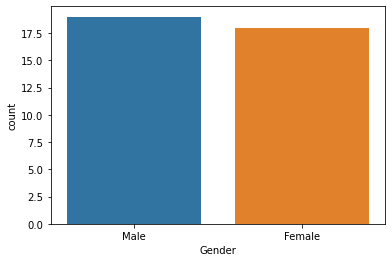

In [42]:
sns.countplot(x = low_cs['Gender']) 
#Berdasarkan data yang kita dapat hanya selisih 1 orang, lebih banyak laki" yang memiliki credit score rendah

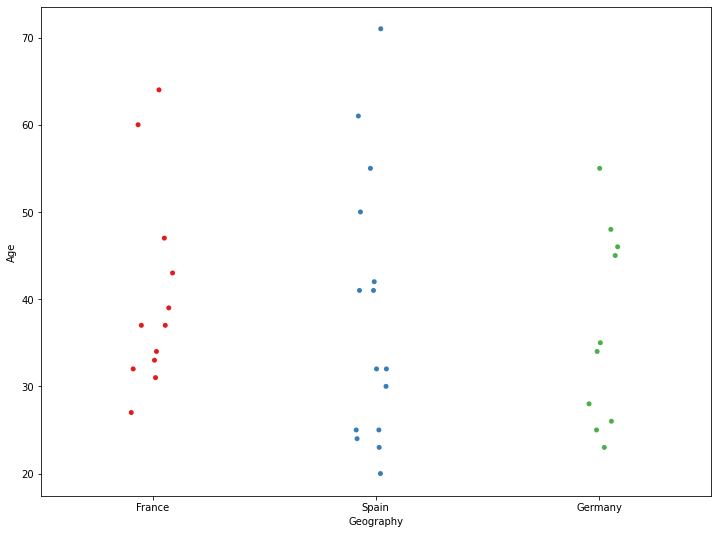

In [67]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'Geography', y = 'Age', data = low_cs, palette='Set1')
#Berikut persebdaran datanya berdasarkan Lokasi Nasabah dan umurnya untuk melihat persebaran datanya

In [47]:
low_cs['Geography'].value_counts()

Spain      15
France     12
Germany    10
Name: Geography, dtype: int64

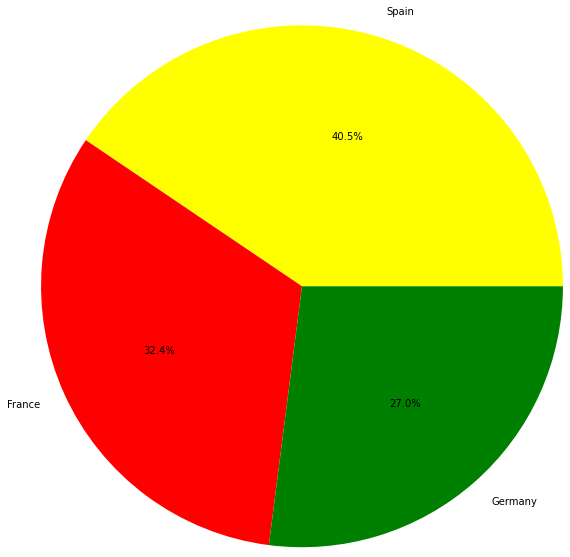

In [48]:
persentase = low_cs.Geography.value_counts().values
nama = ['Spain', 'France', 'Germany']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 3)
plt.show()

# Berikut Komposisi dari Geography Nasabah dengan credit score terrendah

# Insight #3 
Melihat ciri-ciri dari nasabah dengan credit score tinggi sehingga kita dapat mengetahui ciri-ciri orang yang optimal untuk kita izinkan beri pinjaman

In [51]:
high_cs = df_banks[df_banks['CreditScore'] == 850]
high_cs

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
39,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,40812.90,0
181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
201,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
224,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,15709256,Glover,850,France,Female,28,9,0.00,2,1,1,164864.67,0
9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9689,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0


In [80]:
avg_hasil_high_acc_gender = high_cs.groupby(by=high_cs['Gender']).mean()
avg_hasil_high_acc_gender

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,
Female,1.569140e+07,850.0,38.642202,4.733945,74160.093945,1.568807,0.743119,0.559633,91659.391927,0.155963
Male,1.568455e+07,850.0,39.161290,4.895161,82726.412742,1.467742,0.661290,0.540323,99663.941290,0.209677


In [54]:
high_cs['Gender'].value_counts() # Lebih banyak dari nasabah yang memiliki Credit Score tinggi adalah dari kaum pria

Male      124
Female    109
Name: Gender, dtype: int64

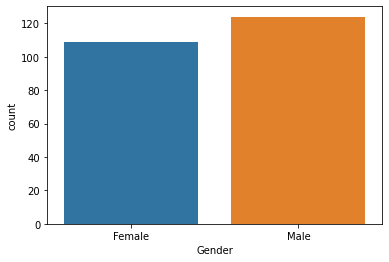

In [52]:
sns.countplot(x = high_cs['Gender']) 

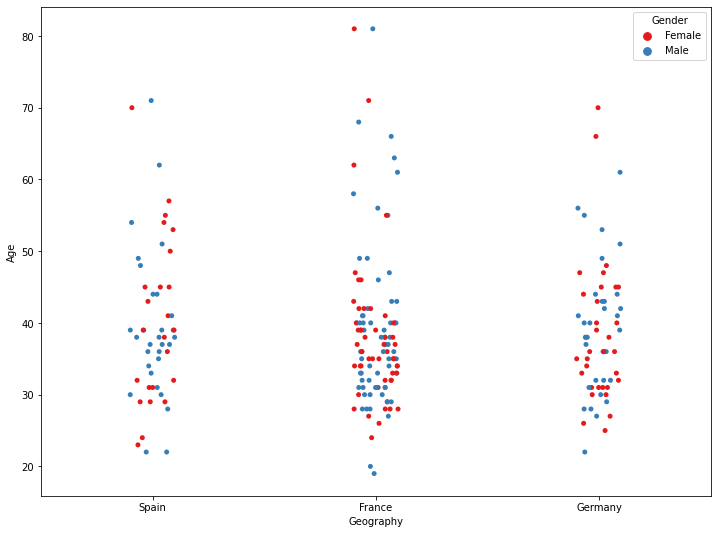

In [55]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'Geography', y = 'Age', data = high_cs, hue='Gender', palette='Set1')
#Berikut persebdaran datanya berdasarkan Lokasi Nasabah dan umurnya untuk melihat persebaran datanya

In [81]:
high_cs.Geography.value_counts()

France     114
Germany     65
Spain       54
Name: Geography, dtype: int64

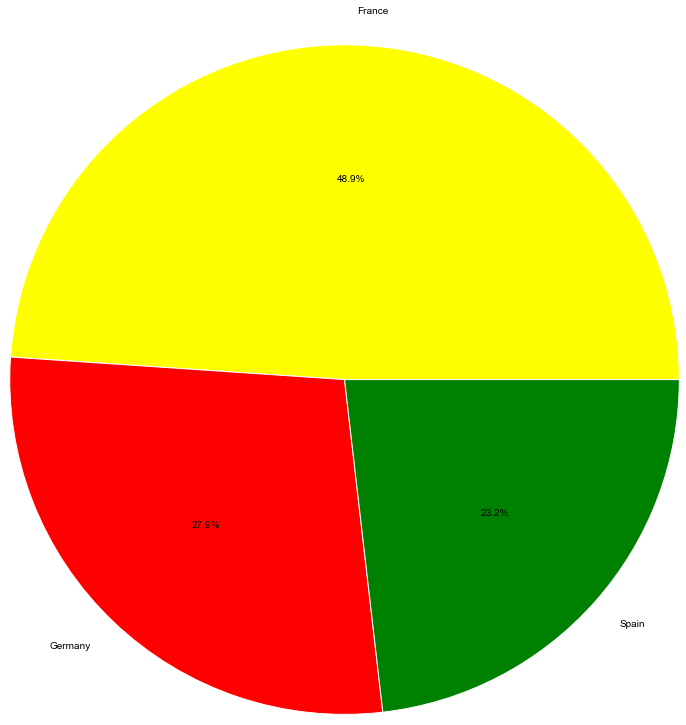

In [83]:
persentase = high_cs.Geography.value_counts().values
nama = ['France', 'Germany', 'Spain']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 3)
plt.show()

# Berikut Komposisi dari Geography Nasabah dengan credit score terrendah

# Insight 4
Orang dengan Estimated Salary yang tinggi cenderung memiliki Credit Score rendah atau tinggi?

In [84]:
df_banks.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
df_banks['EstimatedSalary'].describe().round(2)

count     10000.00
mean     100090.24
std       57510.49
min          11.58
25%       51002.11
50%      100193.92
75%      149388.25
max      199992.48
Name: EstimatedSalary, dtype: float64

In [93]:
high_sal = df_banks[df_banks['EstimatedSalary'] > 100090]
high_sal

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0
9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0


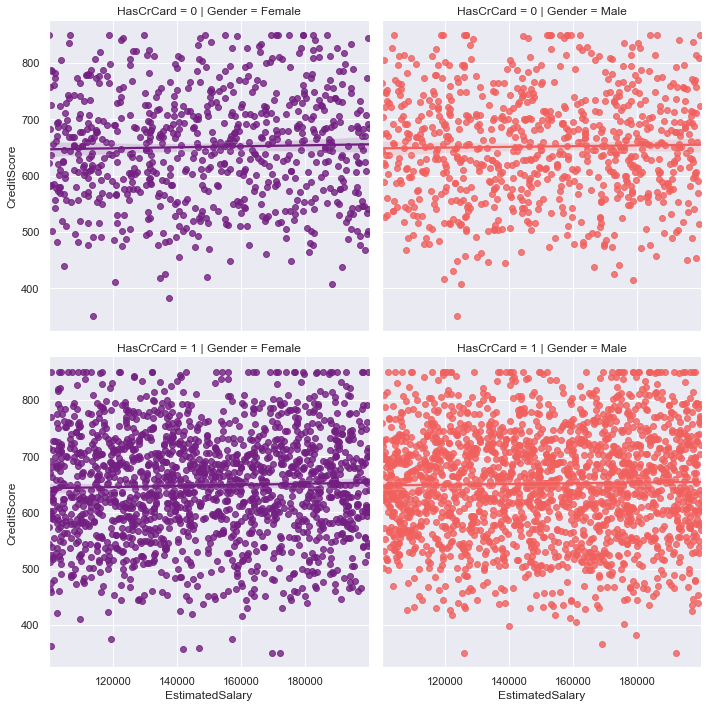

In [94]:
sns.lmplot(x = 'EstimatedSalary', y = 'CreditScore', data=high_sal, hue='Gender', palette='magma', col='Gender', row='HasCrCard')


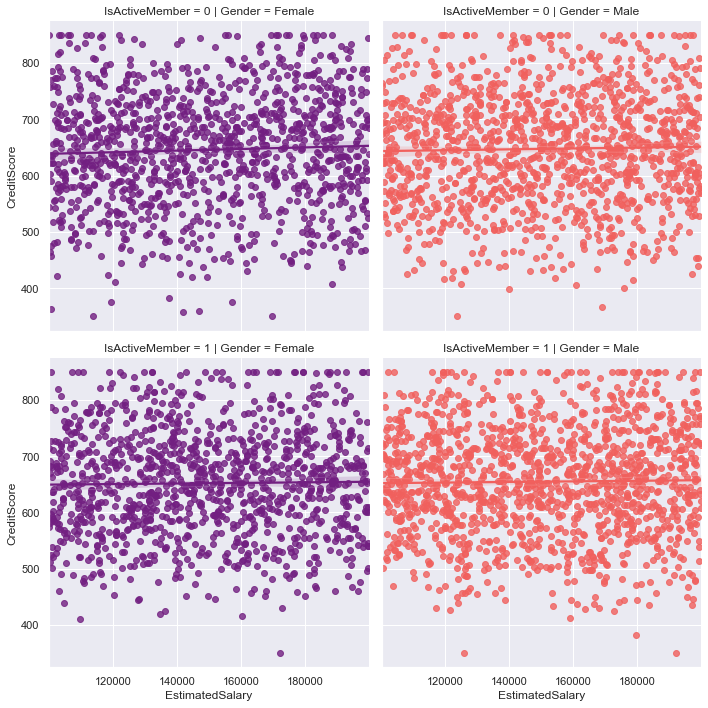

In [95]:
sns.lmplot(x = 'EstimatedSalary', y = 'CreditScore', data=high_sal, hue='Gender', palette='magma', col='Gender', row='IsActiveMember')


Dapat dilihat dari 8 grafik di atas bahwa memang hampir tidak ada korelasi antara CreditScore dengan Estimated Salary. Hal tersebut mengartikan bahwa semakin tingginya CreditScore seseorang tidak dipengaruhi dari gaji yang ia miliki

# Insight 5
Apakah member active, memiliki credit card, dan numOfProducts berpengaruh terhadap rata-rata credit score nasabah?

In [98]:
cs_acc_iam = df_banks.groupby(by=df_banks['IsActiveMember'])['CreditScore'].mean()
cs_acc_iam

IsActiveMember
0    647.973603
1    652.934188
Name: CreditScore, dtype: float64

In [101]:
cs_acc_hcc = df_banks.groupby(by=df_banks['HasCrCard'])['CreditScore'].mean()
cs_acc_hcc

HasCrCard
0    651.345331
1    650.187952
Name: CreditScore, dtype: float64

In [99]:
cs_acc_nop = df_banks.groupby(by=df_banks['NumOfProducts'])['CreditScore'].mean()
cs_acc_nop

NumOfProducts
1    649.120968
2    652.188671
3    648.105263
4    653.583333
Name: CreditScore, dtype: float64

In [104]:
cs_acc_all = df_banks.groupby(by=[df_banks['IsActiveMember'], df_banks['HasCrCard'], df_banks['NumOfProducts']])['CreditScore'].mean()
cs_acc_all

IsActiveMember  HasCrCard  NumOfProducts
0               0          1                649.055710
                           2                650.093207
                           3                651.634146
                           4                655.111111
                1          1                646.294509
                           2                648.439444
                           3                644.750000
                           4                663.954545
1               0          1                648.907360
                           2                658.098453
                           3                629.600000
                           4                678.500000
                1          1                652.113239
                           2                653.796542
                           3                659.371795
                           4                627.736842
Name: CreditScore, dtype: float64

# Kesimpulan Dan Saran

Kesimpulan:

Dari data yang diberikan, tidak ada faktor tertentu yang memiliki dampak relevant terhadap CreditScore seorang nasabah. Suatu nasabah dapat memiliki CreditScore tinggi tidak dapat diukur dari nilai-nilai numerik seperti gajinya, banyak produk yang dimiliki, etc. Ada beberapa faktor yang tidak bisa diukur seperti value, sikap Nasabah tersebut yang lebih berpotensial memiliki pengaruh besar terhadap CreditScore suatu nasabah.


Saran:

Berdasarkan Analisa yang dilakukan, karakteristik nasabah dengan CreditScore tertinggi adalah nasabah tersebut cenderung berasal dari Prancis, rata-rata umurnya 39 tahun untuk jenis kelamin Pria. Sehingga sebaiknya untuk mencari target nasabah adalah ke kaum non-millenial yang sudah mapan.

